In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
def approximate_differentiate(f, x, eps=1e-3):
    return (f(x + eps) - f(x - eps)) / (2 * eps)

In [3]:
# 一次函数
def f(x):
    return 3 * x ** 2 + x + 1

print(approximate_differentiate(f, 3))

19.000000000000128


In [4]:
# 二次函数
def g(x1, x2):
    return (x1 + 5) * (x2 ** 2)

x1 = tf.Variable(3.0)
x2 = tf.Variable(2.0)

def approximate_gradient(g, x1, x2, eps=1e-3):
    dz_x1 = approximate_differentiate((lambda x : g(x, x2)), x1, eps)
    dz_x2 = approximate_differentiate((lambda x : g(x1, x)), x2, eps)
    return dz_x1, dz_x2

In [5]:
x1, x2 = tf.Variable(2.0), tf.Variable(3.0)
print(approximate_gradient(g, x1, x2))

(<tf.Tensor: shape=(), dtype=float32, numpy=8.998871>, <tf.Tensor: shape=(), dtype=float32, numpy=41.997906>)


In [6]:
# tf.GradientTape的求导
with tf.GradientTape(persistent=True) as tape:
    z = g(x1, x2)
    
dz_x1 = tape.gradient(z, x1)
print(dz_x1)

dz_x2 = tape.gradient(z, x2)
print(dz_x2)

dz_x1x2 = tape.gradient(z, [x1, x2])
print(dz_x1x2)

tf.Tensor(9.0, shape=(), dtype=float32)
tf.Tensor(42.0, shape=(), dtype=float32)
[<tf.Tensor: shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: shape=(), dtype=float32, numpy=42.0>]


In [7]:
# 常量
# 多个值一起求导
x1 = tf.constant(3.0)
x2 = tf.constant(2.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x1)
    tape.watch(x2)
    z = g(x1, x2)
    
dz_x1x2 = tape.gradient(z, [x1, x2])
print(dz_x1x2)

[<tf.Tensor: shape=(), dtype=float32, numpy=4.0>, <tf.Tensor: shape=(), dtype=float32, numpy=32.0>]


In [8]:
# 多个函数对同一值求导
x1 = tf.constant(3.0)

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x1)
    z1 = 4 * x1
    z2 = 3 * x1
    
dz_z1z2 = tape.gradient([z1, z2], x1)
print(dz_z1z2)

tf.Tensor(7.0, shape=(), dtype=float32)


In [9]:
# 二元函数二次求导
# f=(x1 + 5) * (x2 ** 2)=x1 * x2 **2 + 5 * x2 ** 2, 
# fx1 = x2 ** 2 => fx1x1 = 0 , fx1x2 = 2 * x2
# fx2 = 2 * x1 * x2 + 10 * x2 => fx2x1 = 2 * x2, fx2x2 = 2 * x1 + 10
# x1 = 2, x2 = 3 =>fx1x1=0, fx1x2=6, fx2x1=6, fx2x2=14

x1 = tf.Variable(2.0)
x2 = tf.Variable(3.0)

with tf.GradientTape(persistent=True) as outTape:
    with tf.GradientTape(persistent=True) as innerTape:
        z = g(x1, x2)
    innerGrads = innerTape.gradient(z, [x1, x2])
outGrads = [outTape.gradient(innerGrad, [x1, x2]) for innerGrad in innerGrads]

print(outGrads)
print(innerGrads)

[[None, <tf.Tensor: shape=(), dtype=float32, numpy=6.0>], [<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=14.0>]]
[<tf.Tensor: shape=(), dtype=float32, numpy=9.0>, <tf.Tensor: shape=(), dtype=float32, numpy=42.0>]


In [10]:
#梯度下降法
#1.求导数，2.前进一点
learning_rate = 0.01
x = tf.Variable(0.0)
xlist = []

for _ in range(100):
    with tf.GradientTape() as tape:
        z = f(x)
    gradient = tape.gradient(z, x)
    xlist.append(gradient)
    x.assign_sub(learning_rate * gradient)  # assign_sub = x - x * learning_rate * gradient
    
print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.16632418>


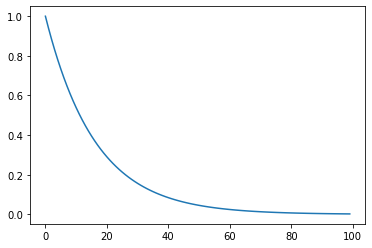

In [11]:
x = np.arange(0,100)
y1 = np.array(xlist)
plt.plot(x, y1)

In [12]:
# 结合optimizer
learning_rate = 0.01
x = tf.Variable(0.0)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

for _ in range(100):
    with tf.GradientTape() as tape:
        z = f(x)
    gradient = tape.gradient(z, x)
    optimizer.apply_gradients([(gradient, x)])  #List of (gradient, variable)
    
print(x)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.16632418>
